In [194]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pandas_profiling

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

### Загружаем данные и смотрим на них

In [195]:
train = pd.read_csv('..//data//house-prices-advanced-regression-techniques//train.csv')
test = pd.read_csv('..//data//house-prices-advanced-regression-techniques//test.csv')

In [196]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [197]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [198]:
train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [199]:
test.isnull().sum().sort_values(ascending=False)[:34]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
dtype: int64

### Заполняем или удаляем миссинги

LotFrontage

In [200]:
train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.mean())
test['LotFrontage'] = test['LotFrontage'].fillna(train.LotFrontage.mean())

Alley

In [201]:
train.drop(columns=['Alley'], inplace=True)
test.drop(columns=['Alley'], inplace=True)

'BsmtCond', 'BsmtQual', 'FireplaceQu', 'GarageType', 'GarageCond', 
         'GarageFinish', 'GarageQual', 'MasVnrType', 'MasVnrArea',
         'BsmtExposure','BsmtFinType2'

In [202]:
list1 = ['BsmtCond', 'BsmtQual', 'FireplaceQu', 'GarageType', 'GarageCond', 
         'GarageFinish', 'GarageQual', 'MasVnrType', 'MasVnrArea',
         'BsmtExposure','BsmtFinType2']

for item in list1:
    train[item] = train[item].fillna(train[item].mode()[0])
    test[item] = test[item].fillna(train[item].mode()[0])

GarageYrBlt, PoolQC, Fence, MiscFeature

In [203]:
list1 = ['GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']

for item in list1:
    train.drop(columns=item, inplace=True)
    test.drop(columns=item, inplace=True)

In [204]:
train.isnull().sum().sort_values(ascending=False)

BsmtFinType1    37
Electrical       1
SalePrice        0
ExterQual        0
RoofStyle        0
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Id               0
Length: 76, dtype: int64

In [205]:
train.dropna(inplace=True)
train.drop(columns=['Id'], inplace=True)
train.shape

(1422, 75)

In [206]:
test.isnull().sum().sort_values(ascending=False)[:20]

BsmtFinType1    42
MSZoning         4
Utilities        2
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
GarageCars       1
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
SaleType         1
Exterior2nd      1
Exterior1st      1
KitchenQual      1
TotalBsmtSF      1
GarageArea       1
Condition2       0
MSSubClass       0
BsmtCond         0
LotFrontage      0
dtype: int64

In [207]:
columns_cat = ['MSZoning', 'BsmtFinType1', 'Utilities','BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 
           'Exterior1st', 'KitchenQual']
columns_num = ['GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',  'TotalBsmtSF', 'GarageArea']

for item in columns_cat:
    test[item] = test[item].fillna(test[item].mode()[0])
for item in columns_num:
    test[item] = test[item].fillna(test[item].mean())

In [208]:
test.drop(columns=['Id'], inplace=True)
test.shape

(1459, 74)

### Генерим фичи

In [209]:
test['test'] = 1
all_df = pd.concat([train, test], axis=0)

In [210]:
all_df.shape

(2881, 76)

In [211]:
buf = pd.DataFrame(all_df.dtypes, columns = ['type'])
columns = list(buf[buf.type=='object'].index)
len(columns)

39

In [212]:
def One_hot_encoding(final_df, columns):
    df_final=final_df
    i=0
    for field in columns:
        df1=pd.get_dummies(final_df[field],drop_first=True)
        
        final_df.drop([field],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [213]:
all_df = One_hot_encoding(all_df, columns)

In [214]:
all_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [215]:
all_df.shape

(2881, 236)

In [216]:
train = all_df[all_df['test']!=1]
test = all_df[all_df['test']==1]

In [217]:
print(train.shape)
print(test.shape)

(1422, 236)
(1459, 236)


In [218]:
X_train = train.drop(columns=['test', 'SalePrice'])
y_train = np.log(train.SalePrice)

X_test = test.drop(columns=['test', 'SalePrice'])

In [219]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1422, dtype: float64

# Обучение моделей

## Случайный лес

In [220]:
n_estimators = [200];
max_depth = [30];
criterions = ['mse'];
max_features = ['auto', 'sqrt', 'log2'];

parameters = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'criterion': criterions,
              'max_features': max_features
        }
grid_RF = GridSearchCV(estimator=RandomForestRegressor(),
                                 param_grid=parameters,
                                 cv=10,
                                 n_jobs = -1)
grid_RF = grid_RF.fit(X_train, y_train).best_estimator_

In [221]:
print(grid_RF)
pred_RF = grid_RF.predict(X_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [233]:
print(mean_absolute_error(y_train, grid_RF.predict(X_train)))
print(mean_squared_error(y_train, grid_RF.predict(X_train)))

0.03511067739246271
0.0027514946998501814


In [224]:
features=X_train.columns
importances = grid_RF.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

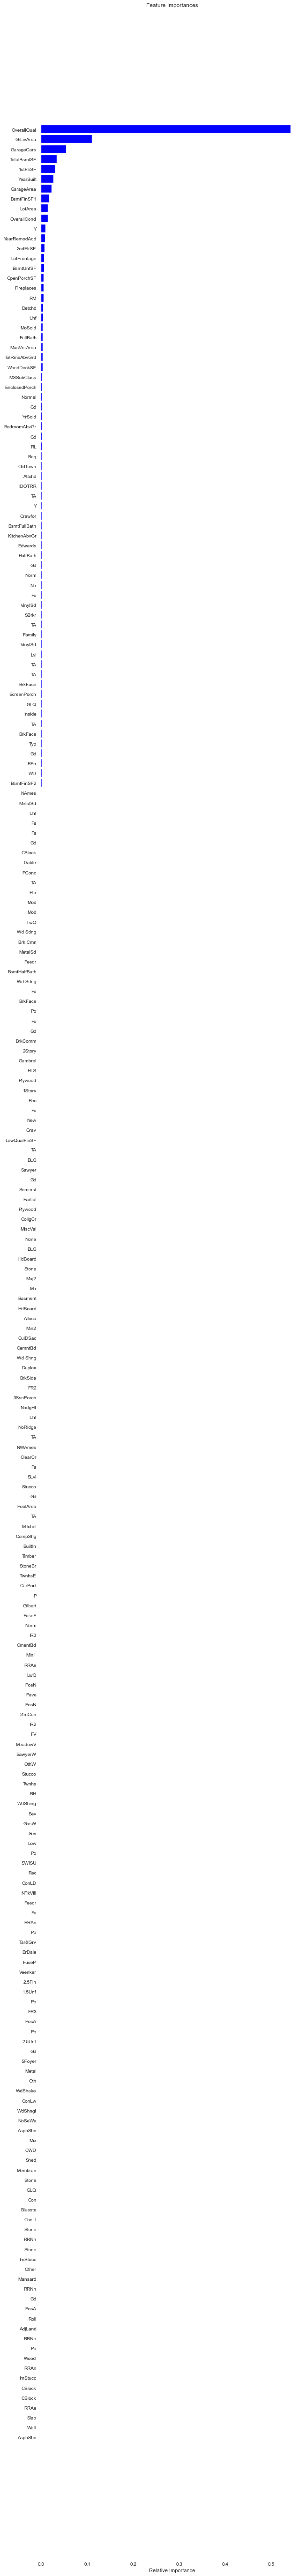

In [225]:
plt.figure(1, figsize=(10, 100))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Cтекинг
Возьмем в стекинг три модели - Дерево решений, к-ближайших соседей и линейную регрессию

In [226]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [227]:
regressor = StackingRegressor(
    [
        ('dt', DecisionTreeRegressor()),
        ('kn', KNeighborsRegressor())
    ],
LinearRegression())

In [231]:
st_reg = regressor.fit(X_train, y_train)
st_reg_1 = st_reg.named_estimators_['dt']
st_reg_2 = st_reg.named_estimators_['kn']

In [234]:
print('MAE')
print(mean_absolute_error(y_train, st_reg_1.predict(X_train)))
print(mean_absolute_error(y_train, st_reg_2.predict(X_train)))
print(mean_absolute_error(y_train, st_reg.predict(X_train)))
print('MSE')
print(mean_squared_error(y_train, st_reg_1.predict(X_train)))
print(mean_squared_error(y_train, st_reg_2.predict(X_train)))
print(mean_squared_error(y_train, st_reg.predict(X_train)))

MAE
3.327403763413069e-06
0.12929833351338435
0.05913041471190267
MSE
8.259793011857864e-10
0.03240611430660765
0.006500644802147924


К сожалению по-нормальному оценить качество получившихся моделей сложно из-за того, что нет ответов для тестовой выборки (задача из kaggle). Но на тренировочной выборке текущая модель стекинга обучилась похуже, чем случайный лес (средняя ошибка больше).